K-NEAREST NEIGHBOURS
Objective:
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?



# 1. Analyse the data using the visualizations

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv("Zoo.csv")

In [9]:
df.head(50)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


# 2. Preprocess the data by handling missing values & Outliers, if any.

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: ylabel='feathers'>

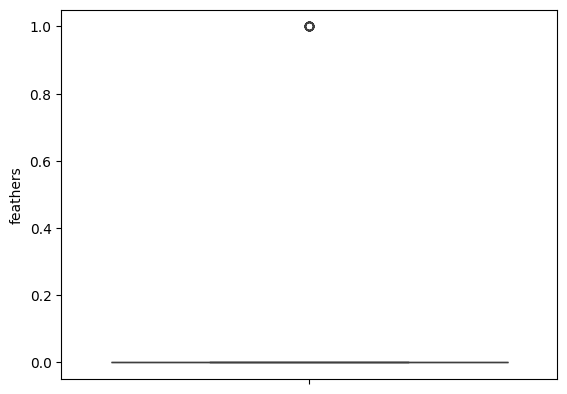

In [11]:
sns.boxplot(df['feathers'])

In [12]:
for i in df.columns:
    print(i)

animal name
hair
feathers
eggs
milk
airborne
aquatic
predator
toothed
backbone
breathes
venomous
fins
legs
tail
domestic
catsize
type


In [13]:
for i in df.columns:
    i=str(i)
    w=df[i].value_counts()
    print( i ,w )

animal name animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64
hair hair
0    58
1    43
Name: count, dtype: int64
feathers feathers
0    81
1    20
Name: count, dtype: int64
eggs eggs
1    59
0    42
Name: count, dtype: int64
milk milk
0    60
1    41
Name: count, dtype: int64
airborne airborne
0    77
1    24
Name: count, dtype: int64
aquatic aquatic
0    65
1    36
Name: count, dtype: int64
predator predator
1    56
0    45
Name: count, dtype: int64
toothed toothed
1    61
0    40
Name: count, dtype: int64
backbone backbone
1    83
0    18
Name: count, dtype: int64
breathes breathes
1    80
0    21
Name: count, dtype: int64
venomous venomous
0    93
1     8
Name: count, dtype: int64
fins fins
0    84
1    17
Name: count, dtype: int64
legs legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64
tail tail
1    

In [14]:
#no outliers are present in the data. All columns contains categorical data

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [15]:
#3. Split the dataset into training and testing sets (80% training, 20% testing).
x=df.drop('animal name',axis=1)
y=df.iloc[:,16:17]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [16]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)  # You can adjust the value of 'n_neighbors'

In [18]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [19]:
y_pred = knn.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348


# 5. Choose an appropriate distance metric and value for K.


# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Different neighbors to try
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'metric': ['euclidean', 'manhattan'],  # Different distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms
}


In [21]:
knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='euclidean',algorithm='ball_tree')  # You can adjust the value of 'n_neighbors'
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9047619047619048
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666


In [22]:
knn = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='manhattan',algorithm='kd_tree')  # You can adjust the value of 'n_neighbors'
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [23]:
knn = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='manhattan',algorithm='brute')  # You can adjust the value of 'n_neighbors'
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# 7. Visualize the decision boundaries of the classifier.

In [27]:
a=df["hair"]
b=df["milk"]
c=df["type"]

KeyError: 'type'

In [28]:
# Sample data creation (replace this with your actual dataset)
data = {
    "hair": a,
    "milk": b,
    "is_mammal": c  # Binary target variable
}
df = pd.DataFrame(data)

In [29]:
# Features and target variable
X = df[['hair', 'milk']]
y = df['is_mammal']  # Directly use the Series as y

In [30]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.decomposition import PCA

In [32]:
#Visulization the decision bondaries using PCA
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)


In [35]:
# KNN classifier with specified parameters
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean', algorithm='ball_tree')
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=4)

In [36]:
# Create a grid of points
x_min, x_max = X['hair'].min() - 1, X['hair'].max() + 1
y_min, y_max = X['milk'].min() - 1, X['milk'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

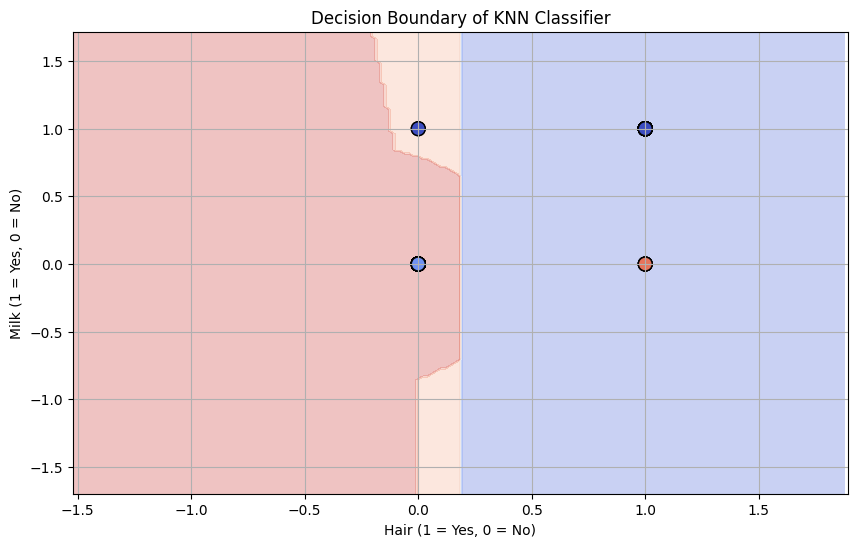

In [39]:

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['hair'], X['milk'], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
plt.title('Decision Boundary of KNN Classifier')
plt.xlabel('Hair (1 = Yes, 0 = No)')
plt.ylabel('Milk (1 = Yes, 0 = No)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()


In [ ]:
#1. What are the key hyperparameters in KNN?
Number of Neighbors (k)=defines number of nearest neighbors  used to predict the decision

Weighting of Neighbors=There are two types
1 Uniform: All neighbors contribute equally to the prediction.
2 Distance-based: Closer neighbors are given more weight than farther ones.

Leaf Size =  In general, the larger leaf_size, the closer neighbors the algorithm picks

Distance Metric=Euclidean, Manhattan, and Minkowski distances,Cosine similarity

In [ ]:
#2. What distance metrics can be used in KNN?
 Euclidean distance is used when we have to calculate the distance of real values like integer, float, etc
 Manhattan Distance (L1 Norm)=The sum of the absolute differences between the Cartesian coordinates of two points.
 Cosine Similarity: Measures the angle between vectors, often used in high-dimensional text data